In [18]:
from sklearn import datasets
(moon_x,moon_y) = datasets.make_moons(n_samples=10000, noise=0.05, random_state=42)
(circle_x,circle_y) = datasets.make_circles(n_samples=10000, noise=0.025, random_state=42)

In [2]:
import keras

Using TensorFlow backend.


In [40]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

X = circle_x
Y = circle_y
model = Sequential()
model.add(Dense(6, input_dim=2, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=5, batch_size=10)
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/5
10000/10000 [==============================] - 8s 768us/step - loss: 0.6767 - acc: 0.5689
Epoch 2/5
10000/10000 [==============================] - 6s 592us/step - loss: 0.6409 - acc: 0.6672
Epoch 3/5
10000/10000 [==============================] - 7s 714us/step - loss: 0.5531 - acc: 0.7922
Epoch 4/5
10000/10000 [==============================] - 5s 540us/step - loss: 0.4343 - acc: 0.8810 2s - loss: 0.4705 - acc:
Epoch 5/5
10000/10000 [==============================] - 1s 146us/step

acc: 98.82%


In [22]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


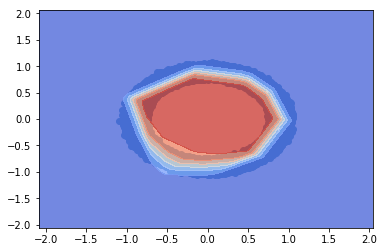

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(circle_x[:,0], circle_x[:,1])
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
plt.show()

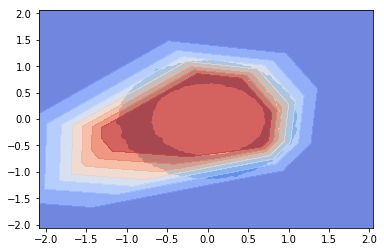

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(circle_x[:,0], circle_x[:,1])
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
plt.show()

In [21]:
moon_y[:10]

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0])